# 01.01 - PROYECTO KAGGLE

## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 75% 15.0M/20.1M [00:00<00:00, 56.3MB/s]
100% 20.1M/20.1M [00:00<00:00, 62.9MB/s]


## unzip and inspect data

In [2]:
!unzip udea*.zip > /dev/null

## load `train.csv` data with pandas



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## visualización de las columnas y algunos registros

In [16]:
train.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

In [6]:
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


## selección de la variable objetivo y mapeo para que sea una variable numerica

In [7]:
target = 'RENDIMIENTO_GLOBAL'
rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
train[target] = train[target].map(rmap)

## visualización de los datos faltantes

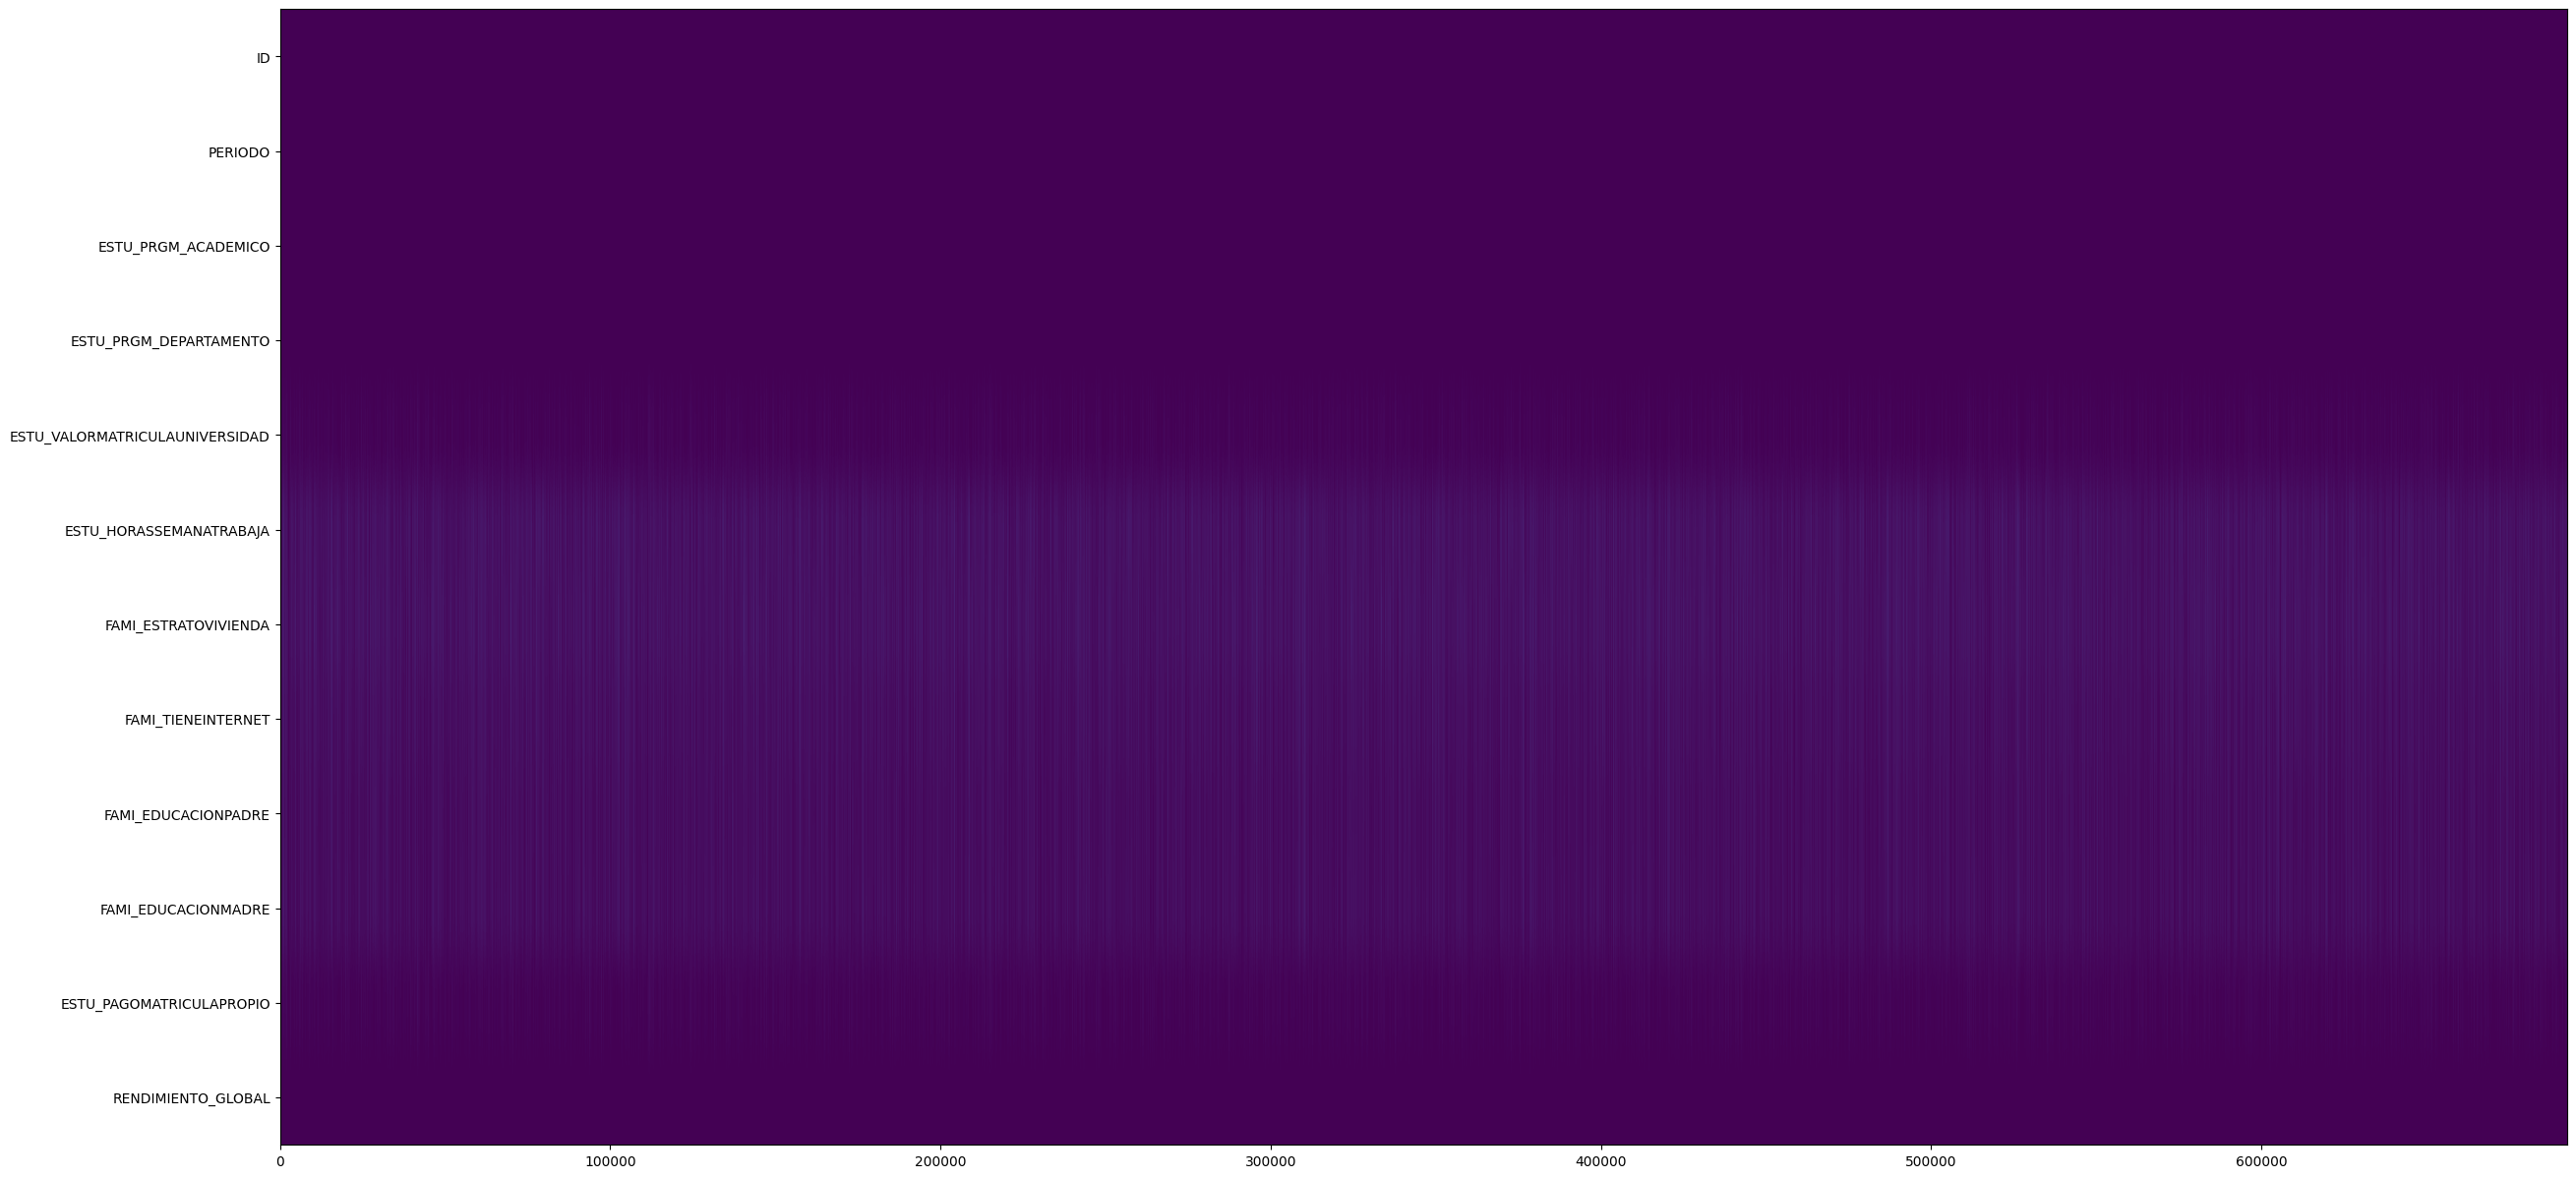

In [8]:
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(train.isna().values.T, aspect='auto')
plt.yticks(range(train.shape[1]), train.columns)
plt.show()

# Visualización de las columnas y su distribución

nota: dado el desbalanceo en la cantidad de categorias para algunas columnas, y para mantener una correcta visualización, decidimos mostrar algunas columnas en plots plot aparte

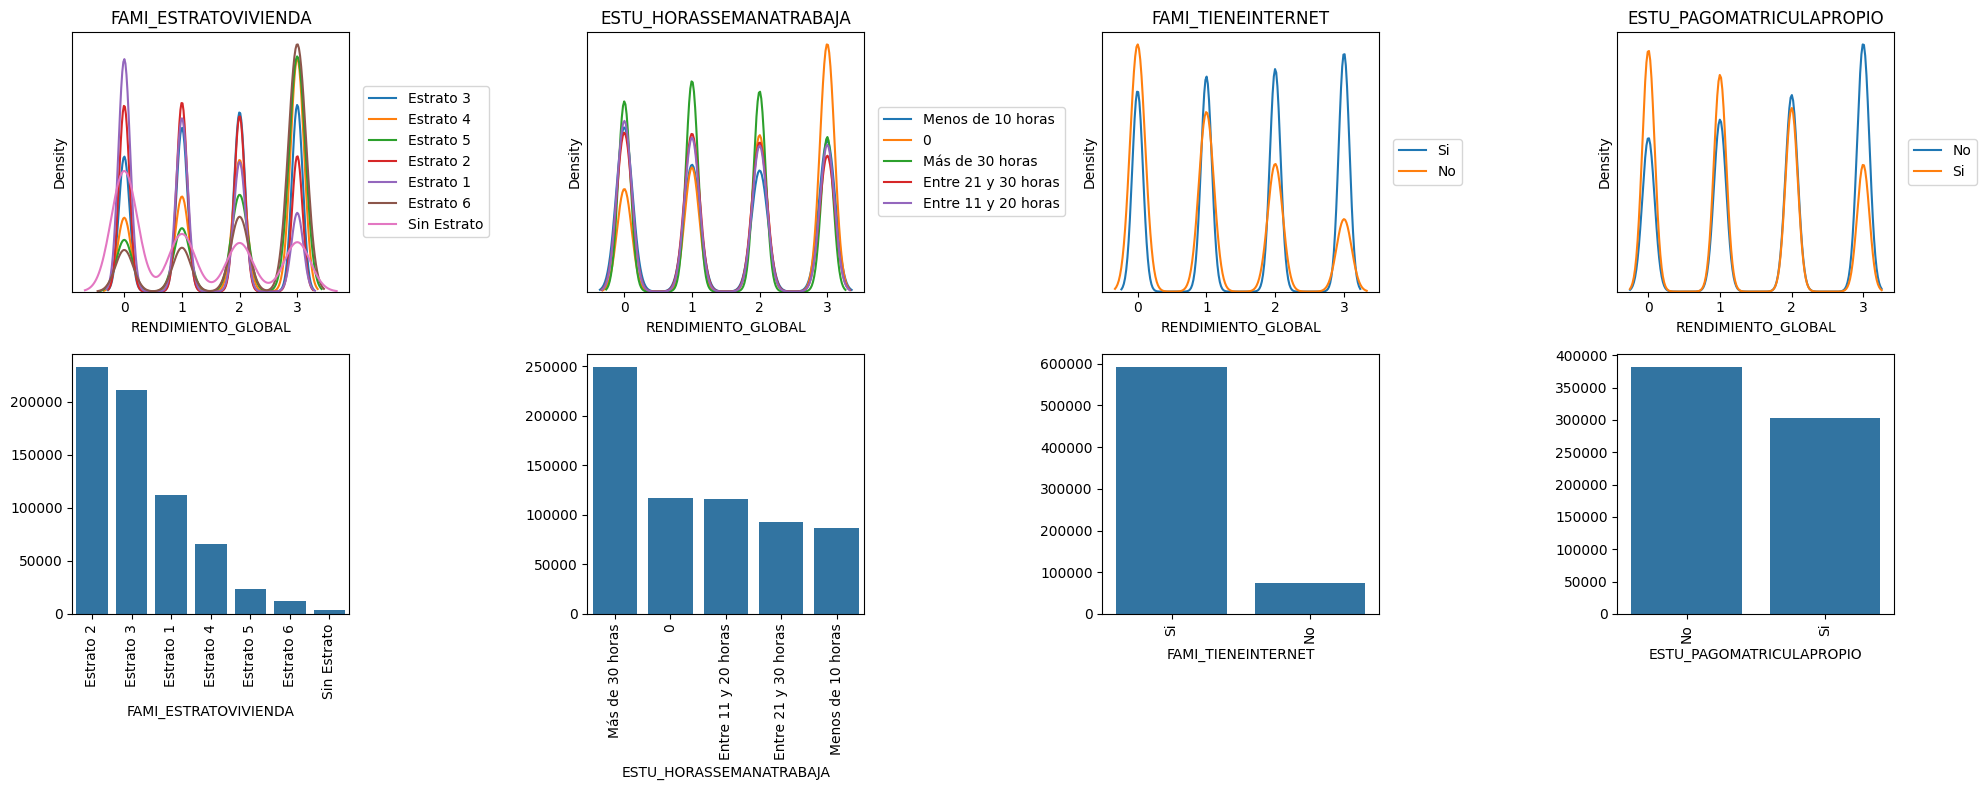

In [9]:
plt.figure(figsize=(20,8))
for i, c in enumerate(["FAMI_ESTRATOVIVIENDA", 'ESTU_HORASSEMANATRABAJA', 'FAMI_TIENEINTERNET', 'ESTU_PAGOMATRICULAPROPIO']):
    plt.subplot(2, 4, i + 1)
    k = train[[c, "RENDIMIENTO_GLOBAL"]].dropna()

    for v in train[c].dropna().unique():
        sns.kdeplot(k.RENDIMIENTO_GLOBAL[k[c] == v], label=v)

    plt.title(c)
    plt.yticks([])

    plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)

    plt.subplot(2, 4, i + 5)
    vc = k[c].value_counts()
    sns.barplot(y=vc.values, x=vc.index)
    plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

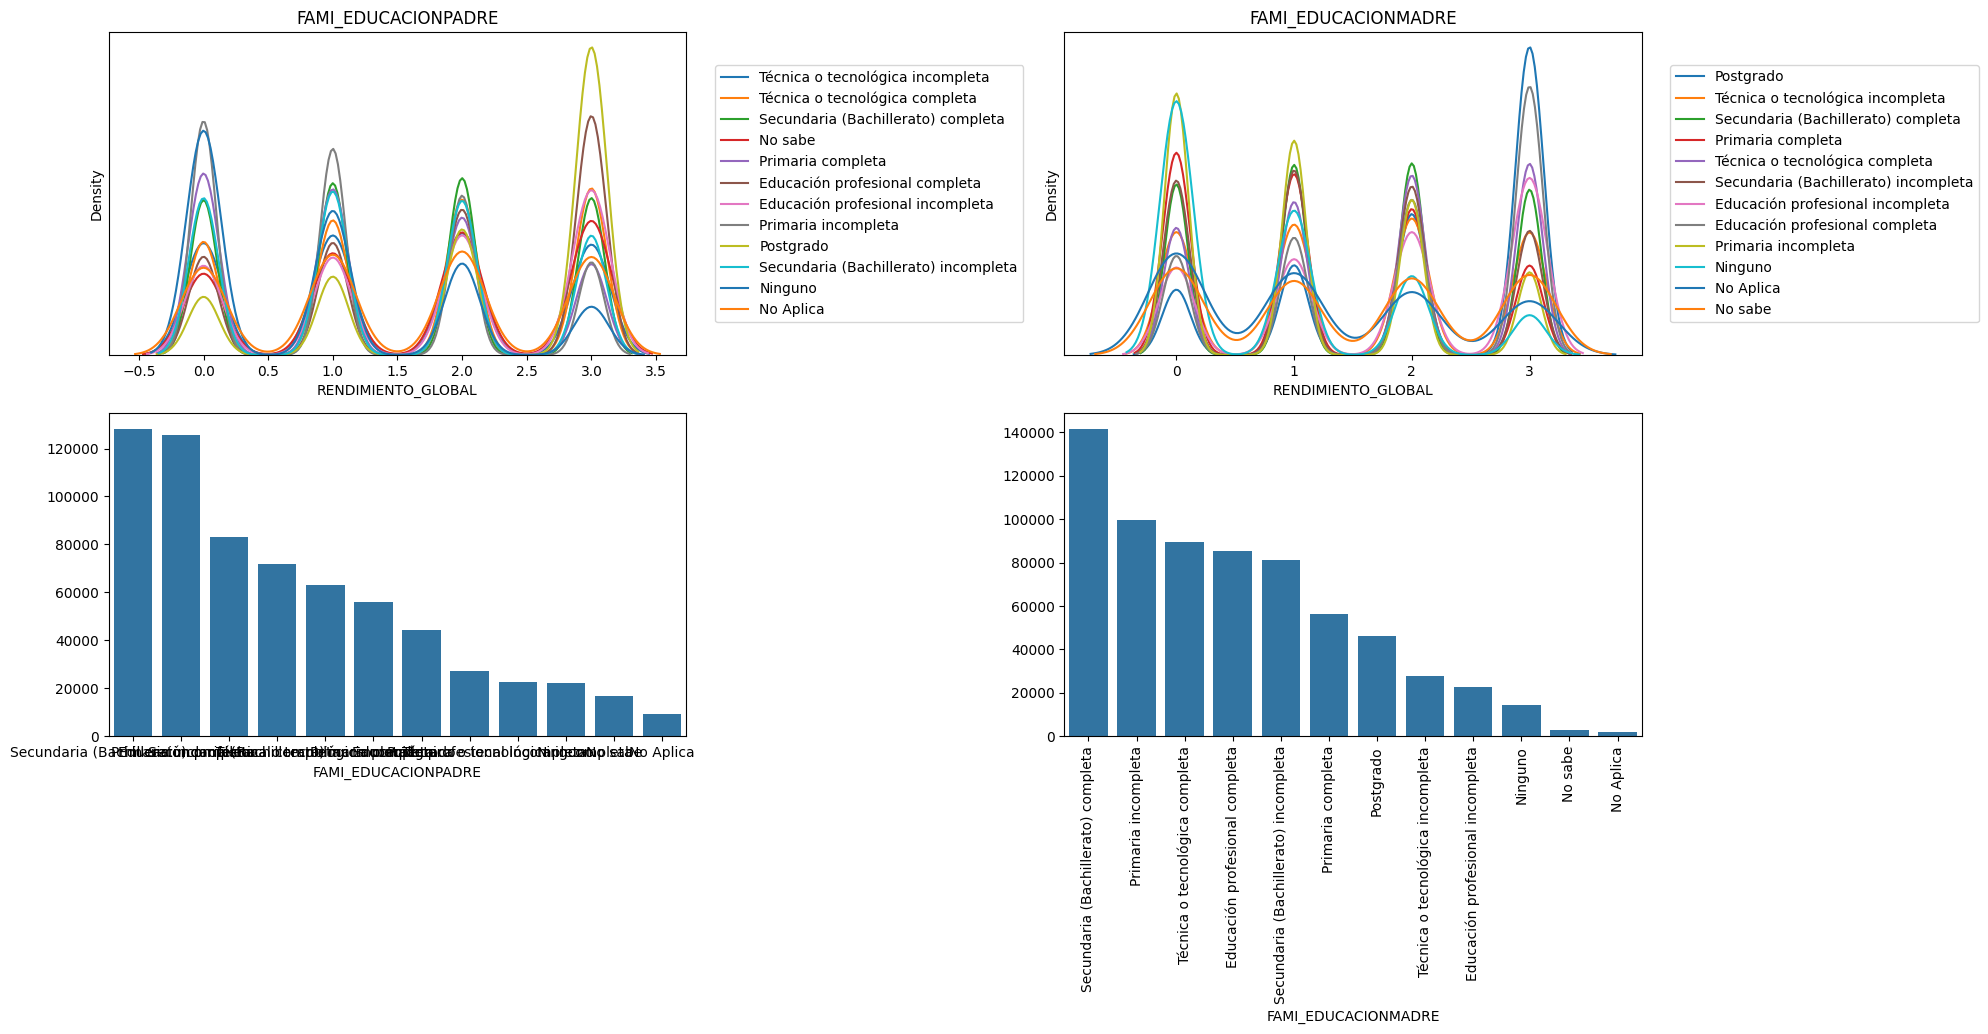

In [15]:

plt.figure(figsize=(20,8))
for i, c in enumerate(['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']):
    plt.subplot(2, 2, i + 1)
    k = train[[c, "RENDIMIENTO_GLOBAL"]].dropna()

    for v in train[c].dropna().unique():
        sns.kdeplot(k.RENDIMIENTO_GLOBAL[k[c] == v], label=v)

    plt.title(c)
    plt.yticks([])

    plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)

    plt.subplot(2, 2, i + 3)
    vc = k[c].value_counts()
    sns.barplot(y=vc.values, x=vc.index)

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

<Figure size 2000x800 with 0 Axes>

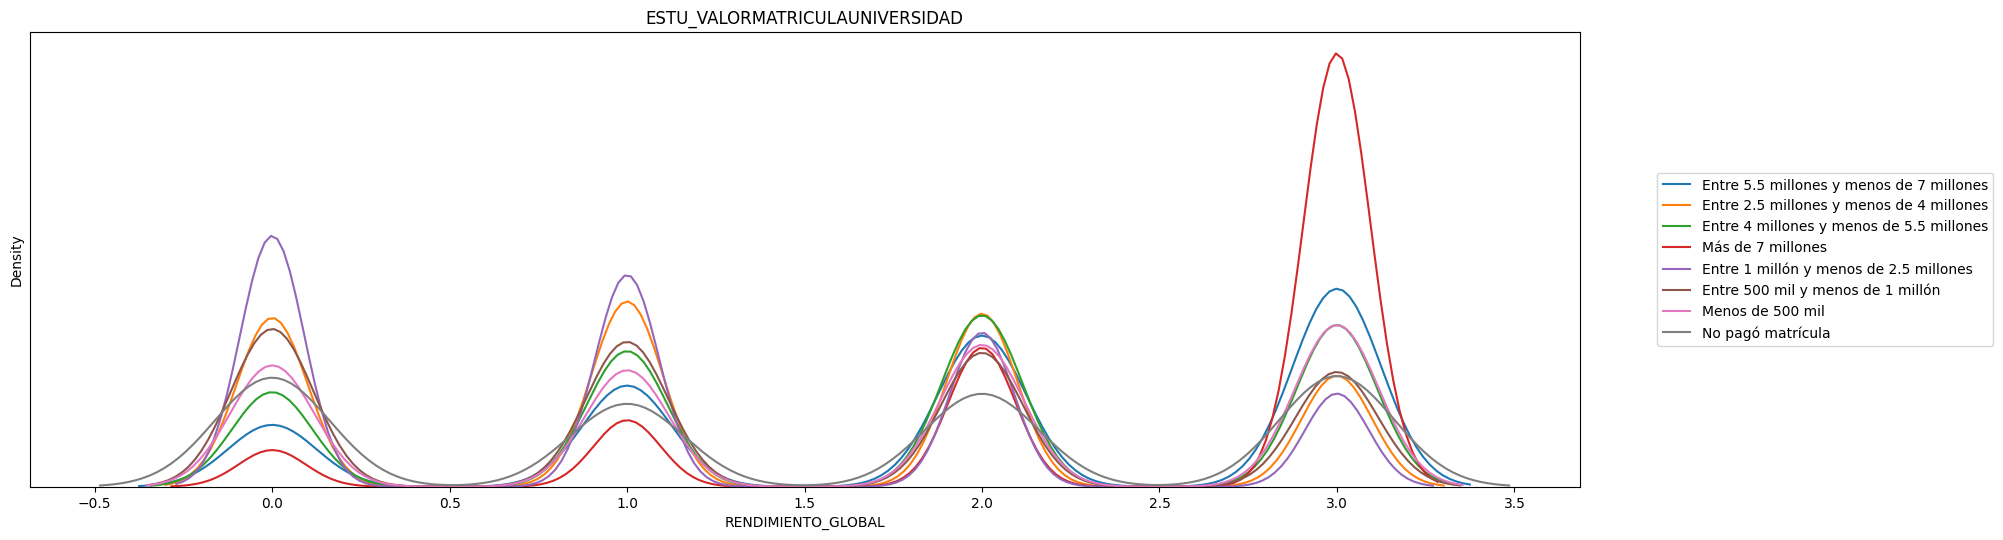

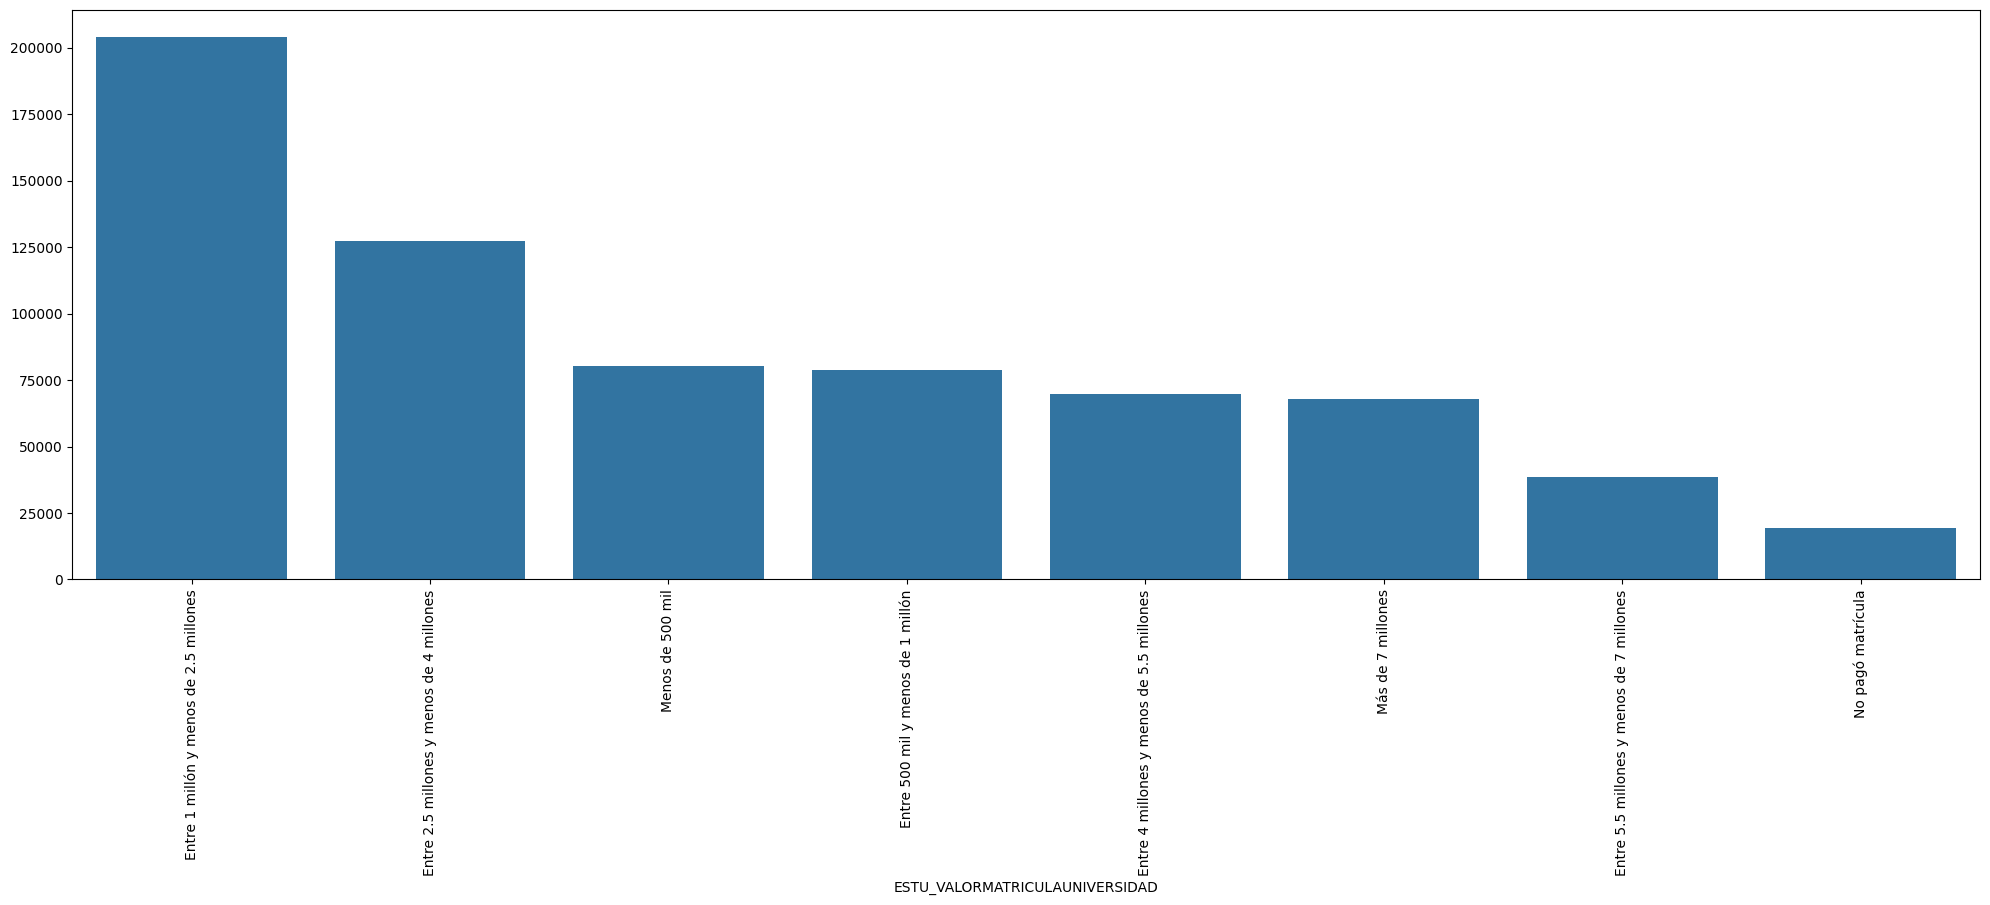

In [13]:
plt.figure(figsize=(20,8))
for i, c in enumerate(['ESTU_VALORMATRICULAUNIVERSIDAD']):
    plt.figure(figsize=(20,13))
    plt.subplot(2, 1, 1)
    k = train[[c, "RENDIMIENTO_GLOBAL"]].dropna()

    for v in train[c].dropna().unique():
        sns.kdeplot(k.RENDIMIENTO_GLOBAL[k[c] == v], label=v)

    plt.title(c)
    plt.yticks([])

    plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)

    plt.figure(figsize=(20,15))
    plt.subplot(2, 1, 2)
    vc = k[c].value_counts()
    sns.barplot(y=vc.values, x=vc.index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

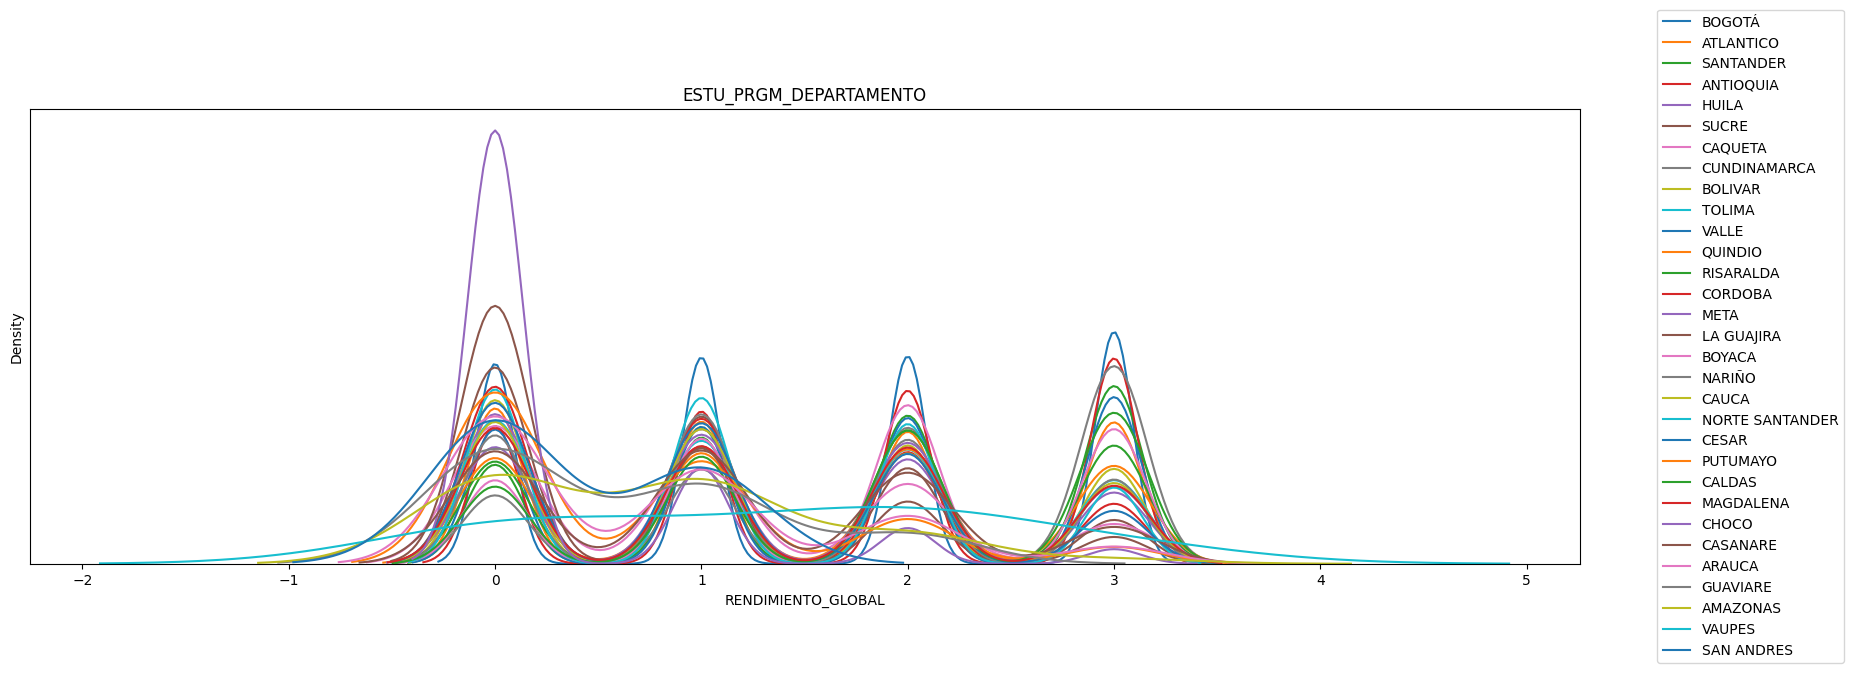

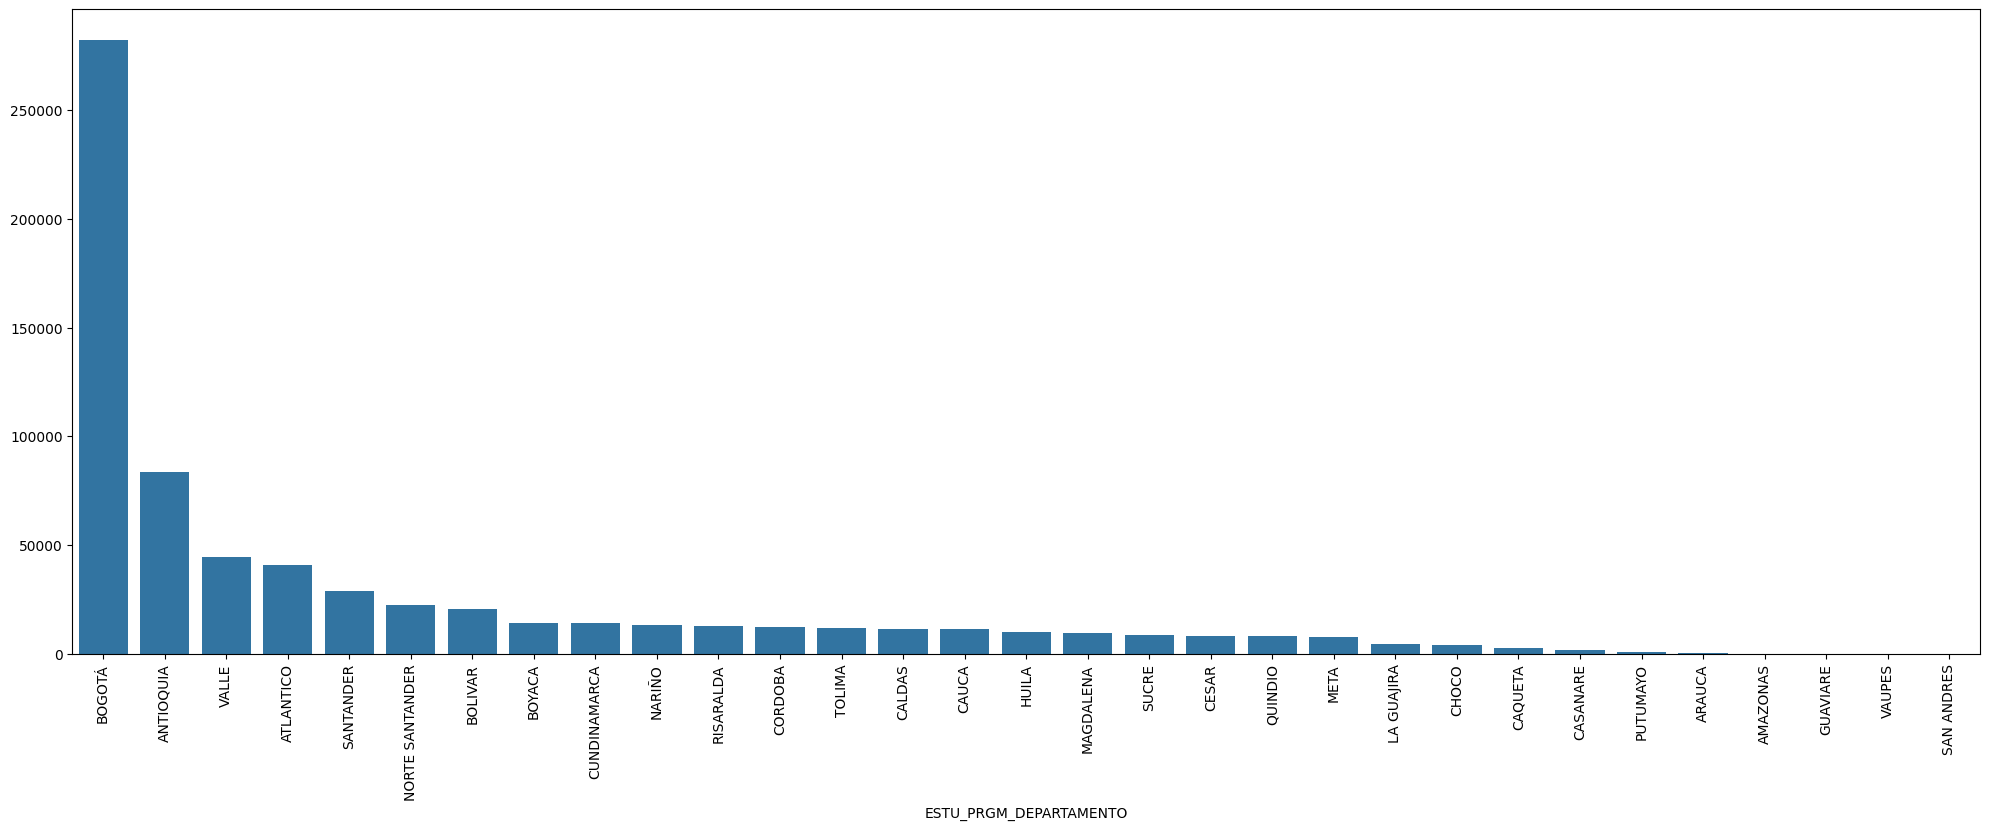

In [12]:
plt.figure(figsize=(20,8))

for i, c in enumerate(['ESTU_PRGM_DEPARTAMENTO']):
    plt.figure(figsize=(20,13))
    plt.subplot(2, 1, 1)
    k = train[[c, "RENDIMIENTO_GLOBAL"]].dropna()

    for v in train[c].dropna().unique():
        sns.kdeplot(k.RENDIMIENTO_GLOBAL[k[c] == v], label=v)

    plt.title(c)
    plt.yticks([])

    plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)

    plt.figure(figsize=(20,15))
    plt.subplot(2, 1, 2)
    vc = k[c].value_counts()
    sns.barplot(y=vc.values, x=vc.index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Conclusiones
* Practicamente todas las columnas son categoricas, se puede pensar en transformar algunas mapeandolas a número (como el estrato) o usando one hot enconding en las que no haya un orden intrinseco.

* Casi la mitad de observaciones provienen de Bogota, por lo que se puede pensar en métodos que simulen nuevas observaciones del resto de departamentos

* En las distribuciones se ven claramente algunas variables con un alto impacto en el rendimiento obtenido por el estudiante, especialmente en los extremos es decir rendimiento bajo y rendimiento alto, algunas de estas son:
   * las horas que trabaja
   * el precio de su matricula
   * la educación de sus padres
   * la posesión de conexión a internet

# Limpieza
todo!!!!

## Things you can try

- other models (svm, random forest, gaussian, etc.)
- different parameters in the models (like `gamma` for svm, or `max_depth` for random forests). see the doc of each model in `sklearn`.
- use different preprocessing and cleaning methods for different columns
- create new columns manually, for instance,
    - group `ESTU_PRGM_ACADEMICO` into areas of knowlege (engineering, social sciences, etc.)
    - do some operation between columns (multiply, concatenate, etc.)
- integrate external data as new columns, for instance, economic data from each department in Colombia, for each different year, etc.
